# Analisi del file CSV character_anime_works

## Analisi
Analizzando il file notiamo come contenga un'informazione interessante; ci permette di sapere se un personaggio è protagonista o comparsa in un determinato anime.
Inoltre ci permette, conoscendo anime_mal_id di raggruppare tutti i personaggi di quel determinato anime, come esempio mostreremo tutti i protagonisti dell'anime 467.

In [1]:
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt
characterAW_df = pd.read_csv('character_anime_works.csv')
roleM = characterAW_df[(characterAW_df['role'] == 'Main') & (characterAW_df['anime_mal_id'] == 467)]
roleM

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Utente\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,anime_mal_id,character_mal_id,character_name,role
111174,467,2677,"Aramaki, Daisuke",Main
111175,467,2653,Batou,Main
111176,467,1795,"Kusanagi, Motoko",Main
111177,467,2654,Togusa,Main


Il risultato di questa analisi è molto interessante perchè ci permette di sapere che l'anime identificato con il numero 467 ha 4 protagonisti e di sapere i rispettivi nomi, tutto ciò diventa ancora più interessante una volta associcato un nome all'id dell'anime 467.
Nel prossimo step analizzeremo invece i dati del file in maniera generale per mostrare eventuali dati anomali o statistiche interessanti.

## Ma gli anime sono composti da più protagonisti o comparse?

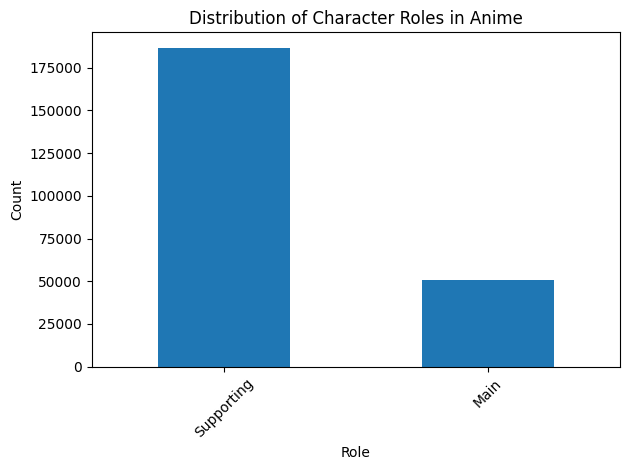

In [2]:

characterAW_df['role'].value_counts().plot(kind='bar')
characterAW_df = characterAW_df.drop_duplicates()

plt.title('Distribution of Character Roles in Anime')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Come possiamo vedere il numero di personaggi 'supporting' spera di ben due volte il numero di protagonisti.

# Analisi del file CSV character_nickname

## Analisi
Analizzando il file notiamo come contenga un nickname per ogni personaggio del mondo anime.

In [3]:
characterNN_df = pd.read_csv('character_nicknames.csv')
characterNN_df.head()

,character_mal_id,nickname
0,280205,Hikaruko
1,280129,Hinacchi
2,280127,Bertha Willis
3,280066,Jimmy
4,280059,Full Body Red Square


Questo csv mi sembra abbastanza inutile : )

# Analisi del file CSV character

Questo file contiene per ogni character_mal_id il suo nome, un bit favorites, impostato a 0 o 1, per alcuni è presente anche una descrizione.
Sarebbe interessante capire quanti dei protagonisti sono anche tra i personaggi preferiti e se hanno tutti una descrizione.

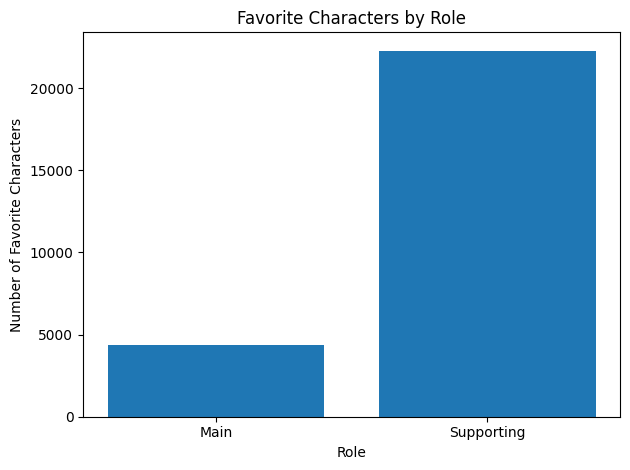

In [25]:
character_df = pd.read_csv('characters.csv')
character_df = character_df.drop_duplicates()
character_df = character_df.drop(columns=['url', 'name_kanji', 'image', 'about'])
character_df = character_df.dropna(subset=['favorites'])
characterAW_df = characterAW_df.rename(columns={'character_id': 'character_mal_id'})
preferiti = character_df[character_df['favorites'] == 1]

roleM = characterAW_df[characterAW_df['role'] == 'Main']
roleS = characterAW_df[characterAW_df['role'] == 'Supporting']
preferitiProtagonisti = pd.merge(preferiti, roleM, on='character_mal_id', how='inner')
preferitiComparse = pd.merge(preferiti, roleS, on='character_mal_id', how='inner')

plt.title('Favorite Characters by Role')
plt.xlabel('Role')
plt.ylabel('Number of Favorite Characters')
plt.bar(['Main', 'Supporting'], [len(preferitiProtagonisti), len(preferitiComparse)])
plt.tight_layout()
plt.show()


Questo grafico è molto interessante perchè potremmo pensare che nel mondo anime i personaagi preferiti siano i protagonisti e questo è in parte vero oltre che un ragiunamento perfettamente logico, i dati però ci mostrano che sono apprezzati allo stesso modo anche i personaggi secondari.
Non sto a riportare i numeri ma avendo fatto i conti riporto un dato molto interessante: i protagonisti del mondo anime rientrano nei personaggi preferiti per il 10% e il dato e molto simile, 9-11% per i personaggi secondari.
In conclusione possiamo dire che esiste un apprezzamento quasi identico tra main character e supporting character e questo lo sappiamo grazie alla percentuale di gradimento che è molto simile tra le due categorie. 